# EmojiGen

#### Data Ingestion

In [11]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [17]:
# Loading emoji data from OpenMoji
# unicode-based emoji
# https://github.com/hfg-gmuend/openmoji/blob/master/data/openmoji.csv
open_moji_df = pd.read_csv('../data/openmoji.csv')

open_moji_df

,emoji,hexcode,group,subgroups,annotation,tags,openmoji_tags,openmoji_author,openmoji_date,skintone,skintone_combination,skintone_base_emoji,skintone_base_hexcode,unicode,order
0,😀,1F600,smileys-emotion,face-smiling,grinning face,"face, grin",NaN,Emily Jäger,2018-04-18,NaN,NaN,NaN,NaN,1,1.0
1,😃,1F603,smileys-emotion,face-smiling,grinning face with big eyes,"face, mouth, open, smile",NaN,Emily Jäger,2018-04-18,NaN,NaN,NaN,NaN,0.6,2.0
2,😄,1F604,smileys-emotion,face-smiling,grinning face with smiling eyes,"eye, face, mouth, open, smile",NaN,Emily Jäger,2018-04-18,NaN,NaN,NaN,NaN,0.6,3.0
3,😁,1F601,smileys-emotion,face-smiling,beaming face with smiling eyes,"eye, face, grin, smile",NaN,Emily Jäger,2018-04-18,NaN,NaN,NaN,NaN,0.6,4.0
4,😆,1F606,smileys-emotion,face-smiling,grinning squinting face,"face, laugh, mouth, satisfied, smile",NaN,Emily Jäger,2018-04-18,NaN,NaN,NaN,NaN,0.6,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,⮼,2BBC,extras-unicode,symbol-other,overlapping black squares,NaN,NaN,loominade,2020-04-22,NaN,NaN,NaN,NaN,1.1,NaN
4280,⯃,2BC3,extras-unicode,symbol-other,horizontal black octagon,NaN,equilateral polygon,loominade,2020-04-17,NaN,NaN,NaN,NaN,5,NaN
4281,⯄,2BC4,extras-unicode,symbol-other,black octagon,NaN,equilateral polygon,loominade,2020-04-17,NaN,NaN,NaN,NaN,5,NaN
4282,⯪,2BEA,extras-unicode,symbol-other,star with left half black,NaN,half star,Alexander Müller,2020-11-09,NaN,NaN,NaN,NaN,11,NaN


In [19]:
# Loading emoji data from Emojipedia
# unicode-based emoji

emojipedia_df = pd.read_csv('../data/emojipedia/emojis_details.csv')

emojipedia_df

,Group,Subgroup,Emoji,Title,DescribedBy,URL,Description,Codepoints Hex
0,smiley,Smiling & Affectionate,😀,Grinning Face,grinning-face,/grinning-face,"A yellow face with simple, open eyes and a bro...",U+1F600
1,smiley,Smiling & Affectionate,😃,Grinning Face with Big Eyes,grinning-face-with-big-eyes,/grinning-face-with-big-eyes,"A yellow face with smiling eyes and a broad, o...",U+1F603
2,smiley,Smiling & Affectionate,😄,Grinning Face with Smiling Eyes,grinning-face-with-smiling-eyes,/grinning-face-with-smiling-eyes,"A yellow face with smiling eyes and a broad, o...",U+1F604
3,smiley,Smiling & Affectionate,😁,Beaming Face with Smiling Eyes,beaming-face-with-smiling-eyes,/beaming-face-with-smiling-eyes,A yellow face with smiling eyes and full-tooth...,U+1F601
4,smiley,Smiling & Affectionate,😆,Grinning Squinting Face,grinning-squinting-face,/grinning-squinting-face,"A yellow face with a broad, open smile and scr...",U+1F606
...,...,...,...,...,...,...,...,...
1888,flags,"Oceania, Island Nations & Territories",🇫🇲,Flag: Micronesia,flag-micronesia,/flag-micronesia,"The flag for Micronesia , which may show as th...","U+1F1EB,U+1F1F2"
1889,objects,Clothing & Appearance,👒,Woman’s Hat,womans-hat,/womans-hat,"A hat worn by women for sun protection, or for...",U+1F452
1890,objects,Office & Stationery,📕,Closed Book,closed-book,/closed-book,"A closed, hardcover book depicted with a red c...",U+1F4D5
1891,objects,Tools & Household Items,📡,Satellite Antenna,satellite-antenna,/satellite-antenna,"A dish antenna, as used to send or receive inf...",U+1F4E1


In [15]:
# Loading emoji data from huggingface/arattinger
# Non unicode-based emoji
# https://huggingface.co/datasets/arattinger/noto-emoji-captions
noto_emoji_df = pd.read_parquet("hf://datasets/arattinger/noto-emoji-captions/data/train-00000-of-00001-42f7c9308efe5fbe.parquet")

noto_emoji_df

,image,text
0,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,a person with a surprised look on their face
1,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,a blue square with a white suitcase and a key
2,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,a yellow crescent with a smiley face
3,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,a little girl dressed in a fairy costume holdi...
4,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,a woman with a pair of scissors in her hand
...,...,...
3463,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,a half of the moon with a half of the moon beh...
3464,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,a woman in a purple shirt and gray pants
3465,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,a woman in a wheelchair with a ponytail
3466,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,a couple of men holding hands


In [16]:
# Loading emoji data from huggingface/badrex
# Unicode-based emoji
# https://huggingface.co/datasets/badrex/llm-emoji-dataset?row=4
llm_emoji_df = pd.read_parquet("hf://datasets/badrex/llm-emoji-dataset/data/train-00000-of-00001.parquet")

llm_emoji_df

,character,unicode,short description,tags,LLM description
0,🥇,U+1F947,1ST PLACE MEDAL,"[first place, victory, achievement, success, c...","This emoji represents a first place medal, oft..."
1,🥈,U+1F948,2ND PLACE MEDAL,"[medal, silver, second place, achievement, suc...","This emoji represents a silver medal, often us..."
2,🥉,U+1F949,3RD PLACE MEDAL,"[medal, bronze, third place, achievement, spor...","This emoji represents a bronze medal, symboliz..."
3,🆎,U+1F18E,AB BUTTON (BLOOD TYPE),"[blood type, AB, medical, compatibility, trans...",This emoji represents the AB blood type symbol...
4,🏧,U+1F3E7,ATM SIGN,"[ATM, banking, finance, money, transaction, lo...","This emoji represents an ATM sign, often used ..."
...,...,...,...,...,...
5029,🤪,U+1F92A,ZANY FACE,"[zany, playful, silly, humor, lightheartedness...","This emoji represents a zany face, expressing ..."
5030,🦓,U+1F993,ZEBRA,"[zebra, animal, stripes, mammal, nature, fast,...","This emoji represents a zebra, a fast and agil..."
5031,🤐,U+1F910,ZIPPER-MOUTH FACE,"[zipper-mouth, silence, secrecy, mute, speechl...",This emoji represents a face with a zipper ove...
5032,🧟,U+1F9DF,ZOMBIE,"[zombie, undead, horror, fiction, scary, reani...","This emoji represents a zombie, a fictional un..."


In [ ]:
# Merge the llm_emoji_df, openmoji_df, emojipedia_df based on unicode/hexcode
# The final df should have unicode, title (short descriotion, annotation), tags, group, subgroup, description)

In [6]:
#Loading stickers dataset Skiittoo/cartoon-faces
%pip install datasets
from datasets import load_dataset
import  pandas as pd

stickers_ds = load_dataset("Skiittoo/cartoon-faces")
print(stickers_ds)

#Convert it into pandas dataframe
stickers_df = pd.DataFrame(stickers_ds['train'])

stickers_df


DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/jupyter-1.0.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 10000
    })
})


,image,text
0,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"Cartoon face with glasses, with facial hair, w..."
1,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"Cartoon face with glasses, with facial hair, o..."
2,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"Cartoon face with glasses, without facial hair..."
3,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"Cartoon face with glasses, without facial hair..."
4,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"Cartoon face with glasses, with facial hair, w..."
...,...,...
9995,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"Cartoon face without glasses, with facial hair..."
9996,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"Cartoon face with glasses, with facial hair, b..."
9997,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"Cartoon face without glasses, with facial hair..."
9998,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"Cartoon face with glasses, with facial hair, d..."


Insights on Stickers Dataset

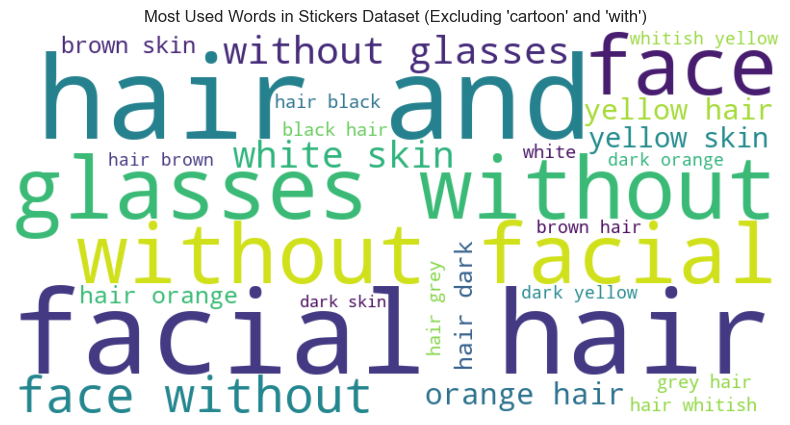

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text data from the stickers dataset
text_data = " ".join(stickers_df['text'])

# Exclude 'cartoon' and 'with' from the word cloud
wordcloud = WordCloud(width=800, height=400, stopwords={'cartoon', 'with'}, background_color='white').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Used Words in Stickers Dataset (Excluding 'cartoon' and 'with')")
plt.show()

In [32]:
# Calculate the most and least common skin colors and hair colors
skin_color_counts = stickers_df.filter(regex='^skin_').sum().sort_values(ascending=False)
hair_color_counts = stickers_df.filter(regex='^hair_').sum().sort_values(ascending=False)

most_common_skin_color = skin_color_counts.idxmax(), skin_color_counts.max()
least_common_skin_color = skin_color_counts.idxmin(), skin_color_counts.min()

most_common_hair_color = hair_color_counts.idxmax(), hair_color_counts.max()
least_common_hair_color = hair_color_counts.idxmin(), hair_color_counts.min()

print("Most Common Skin Color:", most_common_skin_color)
print("Least Common Skin Color:", least_common_skin_color)
print("Most Common Hair Color:", most_common_hair_color)
print("Least Common Hair Color:", least_common_hair_color)

Most Common Skin Color: ('skin_dark skin', 897.0)
Least Common Skin Color: ('skin_fair skin', 0.0)
Most Common Hair Color: ('hair_black hair', 1030.0)
Least Common Hair Color: ('hair_blonde hair', 0.0)


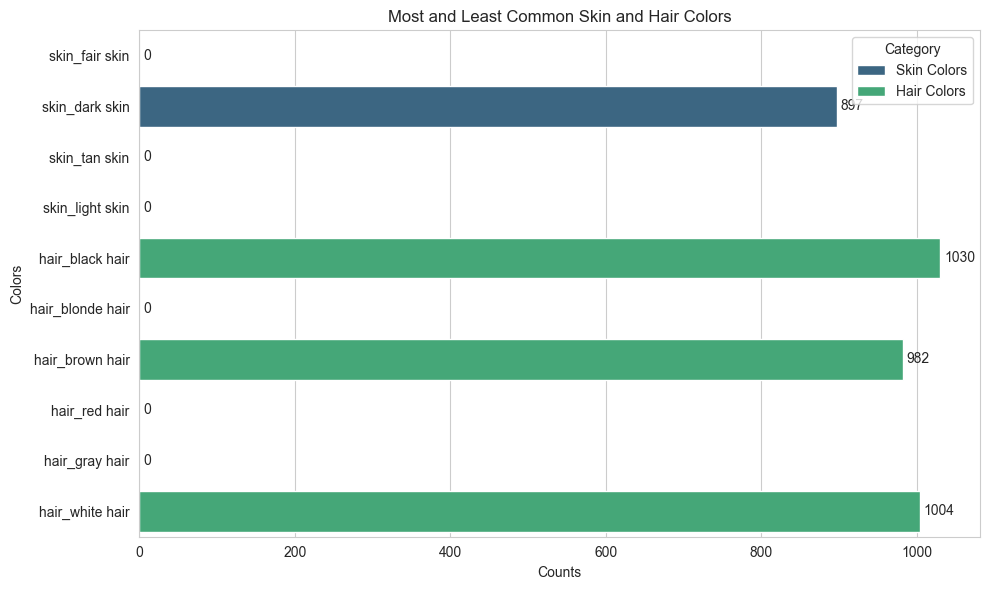

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract skin and hair color counts from stickers_df
skin_colors = ['skin_fair skin', 'skin_dark skin', 'skin_tan skin', 'skin_light skin']
hair_colors = ['hair_black hair', 'hair_blonde hair', 'hair_brown hair', 'hair_red hair', 'hair_gray hair', 'hair_white hair']

skin_counts = stickers_df[skin_colors].sum()
hair_counts = stickers_df[hair_colors].sum()

# Create a combined DataFrame for plotting
combined_counts = pd.DataFrame({
    'Counts': pd.concat([skin_counts, hair_counts]),
    'Category': ['Skin Colors'] * len(skin_counts) + ['Hair Colors'] * len(hair_counts)
}).reset_index()
combined_counts.columns = ['Color', 'Counts', 'Category']

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=combined_counts, x='Counts', y='Color', hue='Category', palette='viridis')

# Add text labels for each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

plt.title("Most and Least Common Skin and Hair Colors")
plt.xlabel("Count")
plt.ylabel("Colors")
plt.legend(title="Category")
plt.tight_layout()
plt.show()

In [20]:
stickers_insights = stickers_df['text'].str.extractall(r'(?P<Attribute>with glasses|without glasses|with facial hair|without facial hair)').groupby('Attribute').size()
objects_subgroup_insights = stickers_insights.reindex(['with glasses', 'without glasses', 'with facial hair', 'without facial hair']).fillna(0).astype(int)
objects_subgroup_insights

Attribute
with glasses           5014
without glasses        4986
with facial hair       4956
without facial hair    5044
dtype: int64

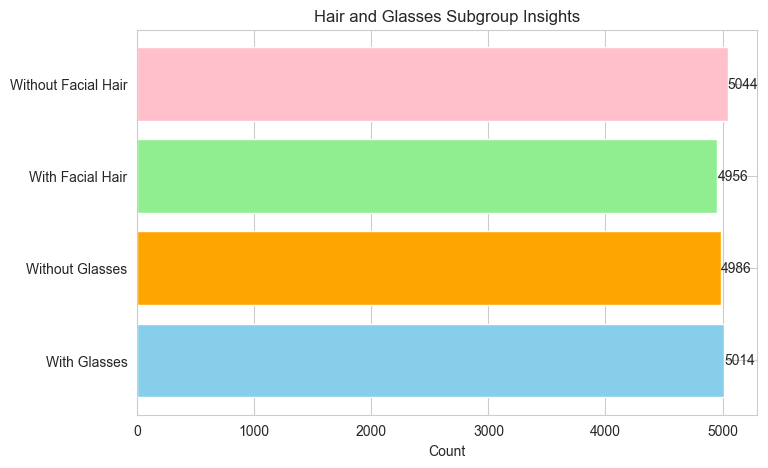

In [37]:
import matplotlib.pyplot as plt

# Data for plotting
labels = ['With Glasses', 'Without Glasses', 'With Facial Hair', 'Without Facial Hair']
values = [objects_subgroup_insights['with glasses'], objects_subgroup_insights['without glasses'],
          objects_subgroup_insights['with facial hair'], objects_subgroup_insights['without facial hair']]

# Define a unique color for each bar
colors = ['skyblue', 'orange', 'lightgreen', 'pink']

# Plot horizontal bar graph
plt.figure(figsize=(8, 5))
bars = plt.barh(labels, values, color=colors)
plt.title("Hair and Glasses Subgroup Insights")
plt.xlabel("Count")
# Add text to each bar
for bar, value in zip(bars, values):
    plt.text(value, bar.get_y() + bar.get_height() / 2, str(value), va='center', ha='left')

# Show the plot
plt.show()